**DATA SET LINK**: https://drive.google.com/drive/folders/1AWBCJIohkEcK6-K5o5LhwC4CHWlvg9bR?usp=sharing

# Cây quyết định cho bài toán dự báo nhân viên nghỉ việc (Decision Tree, NLP, Random Forest (Bagging))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Yêu cầu bài toán
- Dưa vào dữ liệu train, dự đoán trên tập dữ liệu test xem nhân viên nào sẽ nghỉ việc (trường 'Attrition') 
- Tìm xem đâu là nguyên nhân chính làm cho nhân viên nghỉ việc
- Thử nghiệm một chính sách về nhân sự để giữ chân nhân viên và xem coi nó ảnh hưởng thế nào

## Dữ liệu:
- train.csv với kích thước (1000,27): Dùng để huấn luyện mô hình
- test.csv với kích thước (470,26) : Dùng để dự đoán

## Mục tiêu đạt được sau khi làm bài lab:
- Hiểu được qui trình cơ bản khi làm một bài classification dùng tree
- Biết cách visualize dữ liệu cơ bản
- Biết tính độ tương quan giữa các feature
- Biết xử lý category
- Biết xây dựng model và so sánh độ chính xác của model với các model xây dựng bằng thuật toán khác.
- Đọc được kết quả của model và visualize nó
- Biết sử dụng model để làm công cụ dự báo và thử nghiệm giả thuyết

In [ ]:
import pandas as pd
from tensorflow.random import set_seed
set_seed(1612)
import numpy as np
np.random.seed(1612)
import seaborn as sns
sns.set()


# 1. Chuẩn bị dữ liệu



In [ ]:
import os

PATH = '/content/drive/My Drive/Colab Notebooks/employee'

df_raw = pd.read_csv(os.path.join(PATH, 'train.csv'), index_col='EmployeeNumber')
df_test = pd.read_csv(os.path.join(PATH, 'test.csv'), index_col='EmployeeNumber')

Xem thử dữ liệu của train data

In [ ]:
df_raw.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1000.0000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,36.992000,9.0670,2.868000,1.0,2.731000,2.769000,6627.086000,2.68900,15.192000,3.154000,2.741000,0.762000,11.410000,2.773000,2.763000,7.134000,4.26600,2.23500,4.168000
std,9.417783,8.1089,1.030358,0.0,1.083426,1.098565,4842.436233,2.53312,3.657118,0.361129,1.087705,0.836694,8.006748,1.311942,0.698082,6.355032,3.63572,3.30283,3.630283
min,18.000000,1.0000,1.000000,1.0,1.000000,1.000000,1009.000000,0.00000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000
25%,30.000000,2.0000,2.000000,1.0,2.000000,2.000000,2868.000000,1.00000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.00000,2.000000
50%,36.000000,7.0000,3.000000,1.0,3.000000,3.000000,4936.000000,1.50000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.00000,3.000000
75%,43.000000,14.0000,4.000000,1.0,4.000000,4.000000,8723.000000,4.00000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.00000,7.000000
max,60.000000,29.0000,5.000000,1.0,4.000000,4.000000,19999.000000,9.00000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.00000,17.000000


In [ ]:
df_raw.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,3,Male,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,Male,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,4,Female,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,1,Male,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


Chú thích cho các cột trong data

**Education**
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

**EnvironmentSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**JobSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**PerformanceRating**
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

**RelationshipSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**WorkLifeBalance**
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

Xem các giá trị unique trong cột bất kì

In [ ]:
df_raw.Department.unique() # thử đổi features cột

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

Hãy dành 1 chút thời gian kiểm tra toàn bộ các cột trong dataframe để hiểu rõ hơn về dataset

In [ ]:
# TODO
df_raw.EducationField.unique() 

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

Mục tiêu của bài toán là dự đoán xem nhân viên có nghỉ việc hay không. 

Cột mà chúng ta quan tâm là **`Attrition`**, hiện tại đang có value là **{Yes, No}**, ta cần chuyển sang dạng số **{1, 0} (Yes / No)**

In [ ]:
df_test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
1409,52,Travel_Rarely,Research & Development,8,4,Other,1,3,Female,Laboratory Technician,1,Married,2950,9,No,13,3,3,0,12,2,1,5,4,0,4
1411,37,Travel_Rarely,Research & Development,11,3,Medical,1,1,Female,Laboratory Technician,3,Single,3629,4,No,18,3,1,0,8,6,3,3,2,0,2
1412,35,Travel_Frequently,Research & Development,18,2,Life Sciences,1,3,Male,Manufacturing Director,4,Single,9362,2,No,11,3,3,0,10,2,3,2,2,2,2
1415,25,Travel_Rarely,Research & Development,1,3,Technical Degree,1,1,Male,Laboratory Technician,4,Married,3229,4,No,11,3,2,1,7,2,2,3,2,0,2
1417,26,Travel_Rarely,Research & Development,7,3,Other,1,3,Male,Laboratory Technician,1,Single,3578,0,No,12,3,4,0,8,2,3,7,7,0,7


In [ ]:
# TODO
# 1. Google search for usage of pandas map() function
# 2. Apply it on Attrition column for df_raw
# 3. Print out the first 5 columns of df_raw
df_raw['Attrition'] = df_raw['Attrition'].map({'Yes': 1, 'No': 0})
df_raw.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,1,3,Male,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,Research & Development,2,2,Other,1,4,Male,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,1,4,Female,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,1,Male,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
# TODO
# 1. Create y from Attrition column
# 2. Create df_full = df_raw without Attrition column
# 3. Print out the shape of df_full
# 4. Print out the first 5 columns of df_full
y = df_raw.Attrition # chỉ khi tên cột ko có space # model thì df hay np đều nhận
df_full = df_raw.drop(columns=['Attrition'])
print(df_full.shape)
df_full.head()

(1000, 26)


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,Travel_Frequently,Research & Development,8,1,Life Sciences,1,3,Male,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Travel_Rarely,Research & Development,2,2,Other,1,4,Male,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,Travel_Frequently,Research & Development,3,4,Life Sciences,1,4,Female,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,Travel_Rarely,Research & Development,2,1,Medical,1,1,Male,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


Nhớ rằng, ta cần biến toàn bộ giá trị text trong X thành giá trị số để đưa vào model.

Đầu tiên ta cần check kiểu giá trị của toàn bộ các cột trong Dataframe

In [ ]:
df_full.info() # check nào số nào ko phải số

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1408
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   BusinessTravel            1000 non-null   object
 2   Department                1000 non-null   object
 3   DistanceFromHome          1000 non-null   int64 
 4   Education                 1000 non-null   int64 
 5   EducationField            1000 non-null   object
 6   EmployeeCount             1000 non-null   int64 
 7   EnvironmentSatisfaction   1000 non-null   int64 
 8   Gender                    1000 non-null   object
 9   JobRole                   1000 non-null   object
 10  JobSatisfaction           1000 non-null   int64 
 11  MaritalStatus             1000 non-null   object
 12  MonthlyIncome             1000 non-null   int64 
 13  NumCompaniesWorked        1000 non-null   int64 
 14  OverTime                

In [ ]:
print(y)

EmployeeNumber
1       1
2       0
4       1
5       0
7       0
       ..
1402    0
1403    0
1405    1
1407    0
1408    0
Name: Attrition, Length: 1000, dtype: int64


In [ ]:
# TODO
# 1. Get the name of all columns which have dtype == 'object'
# 2. Get the name of all columns which have dtype != 'object'
# 3. Name them cols_cat and cols_num
# 4. Print out the values
g = df_full.columns.to_series().groupby(df_full.dtypes).groups
print(g)
dct = {k.name: v for k, v in g.items()}
print(dct)
# {'object': ['C', 'D'], 'int64': ['A', 'E'], 'float64': ['B']}
print(dct.get('object'))
print(dct.get('int64'))

{dtype('int64'): Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object'), dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')}
{'int64': Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'Year

In [ ]:
cols_cat = [x for x in df_full.columns if (df_full[x].dtypes=='object')]
cols_num = [x for x in df_full.columns if (df_full[x].dtypes!='object')]
print(cols_cat)
print(cols_num)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# 2. Tìm hiểu về dữ liệu
## 2.1 Xem dữ bằng đồ thị

In [ ]:
#sns.pairplot(df_raw)

## 2.2 Mối tương quan giữa các biến đầu vào dùng Pearson correlation
$$ r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}$$

In [ ]:
df_full[cols_num].corr()

,Age,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.018776,0.182582,NaN,0.035695,-0.022625,0.505284,0.312032,-0.044510,-0.053793,0.053249,0.003061,0.690203,-0.005170,-0.029218,0.316925,0.205668,0.215158,0.199571
DistanceFromHome,-0.018776,1.000000,0.021307,NaN,-0.022899,0.006346,-0.045598,-0.017844,0.043278,0.030998,0.015248,0.051631,-0.022563,-0.007602,-0.055194,-0.028068,-0.001148,-0.009895,-0.009326
Education,0.182582,0.021307,1.000000,NaN,0.009408,0.004871,0.091692,0.124625,-0.016113,-0.034090,0.007871,-0.009772,0.132150,-0.040701,0.014913,0.062936,0.075918,0.080601,0.093444
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.035695,-0.022899,0.009408,NaN,1.000000,0.016704,-0.004776,-0.004252,-0.066280,-0.044962,-0.016709,0.009914,0.006842,-0.035961,0.033415,-0.004355,0.023520,0.017404,-0.011404
JobSatisfaction,-0.022625,0.006346,0.004871,NaN,0.016704,1.000000,-0.035175,-0.064331,0.001832,-0.021260,-0.012423,0.025072,-0.046123,0.014282,-0.062323,-0.039150,-0.026454,-0.047373,-0.051252
MonthlyIncome,0.505284,-0.045598,0.091692,NaN,-0.004776,-0.035175,1.000000,0.150945,-0.068754,-0.061870,0.026040,0.004718,0.780205,-0.003869,0.020385,0.527463,0.376103,0.347272,0.347135
NumCompaniesWorked,0.312032,-0.017844,0.124625,NaN,-0.004252,-0.064331,0.150945,1.000000,0.000509,0.003167,0.037947,0.005659,0.250892,-0.051385,0.008657,-0.103055,-0.075352,-0.024038,-0.092171
PercentSalaryHike,-0.044510,0.043278,-0.016113,NaN,-0.066280,0.001832,-0.068754,0.000509,1.000000,0.772665,-0.046371,-0.013512,-0.065660,-0.017195,-0.049206,-0.066833,-0.027409,-0.043352,-0.037266
PerformanceRating,-0.053793,0.030998,-0.034090,NaN,-0.044962,-0.021260,-0.061870,0.003167,0.772665,1.000000,-0.010484,-0.004466,-0.035706,-0.023329,-0.045671,-0.025575,0.017563,-0.002677,0.002388


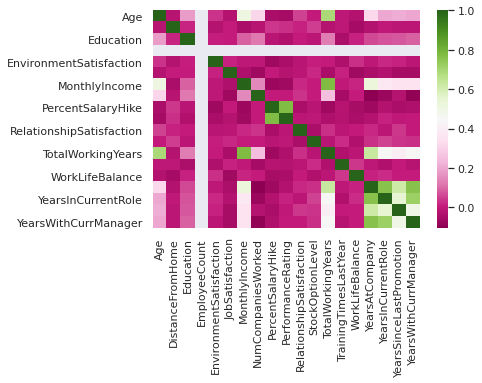

In [ ]:
sns.heatmap(df_full[cols_num].corr(),cmap="PiYG")

# 3. Xử lý category
- Có nhiều phương pháp như label encoding, onehot encoding, count encoding, target encoding, v.v. Tùy vào dữ liệu mà mỗi phương pháp sẽ có ưu nhược điểm khác nhau. Xem thêm thư viện xử lý categories của sklearn nếu muốn tìm hiểu sâu hơn.
- Để đơn giản hóa, ta dùng onehot encoding trong bài này

Thư viện pandas đã cung cấp sẵn hàm get_dummies để áp dụng One Hot Encoding

In [ ]:
df_full.head(10)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,Travel_Frequently,Research & Development,8,1,Life Sciences,1,3,Male,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Travel_Rarely,Research & Development,2,2,Other,1,4,Male,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,Travel_Frequently,Research & Development,3,4,Life Sciences,1,4,Female,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,Travel_Rarely,Research & Development,2,1,Medical,1,1,Male,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
8,32,Travel_Frequently,Research & Development,2,2,Life Sciences,1,4,Male,Laboratory Technician,4,Single,3068,0,No,13,3,3,0,8,2,2,7,7,3,6
10,59,Travel_Rarely,Research & Development,3,3,Medical,1,3,Female,Laboratory Technician,1,Married,2670,4,Yes,20,4,1,3,12,3,2,1,0,0,0
11,30,Travel_Rarely,Research & Development,24,1,Life Sciences,1,4,Male,Laboratory Technician,3,Divorced,2693,1,No,22,4,2,1,1,2,3,1,0,0,0
12,38,Travel_Frequently,Research & Development,23,3,Life Sciences,1,4,Male,Manufacturing Director,3,Single,9526,0,No,21,4,2,0,10,2,3,9,7,1,8


In [ ]:
example = pd.get_dummies(df_full.Department)
example.head()

,Human Resources,Research & Development,Sales
EmployeeNumber,,,
1,0,0,1
2,0,1,0
4,0,1,0
5,0,1,0
7,0,1,0


In [ ]:
# TODO
# 1. Apply one hot encoding for all categorical columns
# 2. concat
one_hot = pd.get_dummies(df_full[cols_cat])
one_hot.head()
one_hot

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
5,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1403,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1405,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [ ]:
# pd.concat auto xoá đi cột gốc 
df_full_merge = pd.concat([df_full[cols_num], pd.get_dummies(data=df_full[cols_cat])], axis=1) # Train
df_test_merge = pd.concat([df_test[cols_num], pd.get_dummies(data=df_test[cols_cat])], axis=1) # Test
print(df_full_merge.shape)
df_full_merge.head(3)

(1000, 47)


,Age,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,2,1,2,4,5993,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,49,8,1,1,3,2,5130,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,37,2,2,1,4,3,2090,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1


# 4. Xây dựng model
- Sử dụng Deep Learning
- Sử dụng thuật toán Decision Tree
- Sử dụng thuật toán Random Forest (ensemble của decision tree)
- So sánh

Đầu tiên ta cần chia dữ liệu thành 2 Set: Train và Validation

In [ ]:
# TODO
# 1. Apply Train Test Split, test_size=0.2
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_full_merge,y,test_size=0.4,shuffle=True,random_state=1612)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)

Shape of X_train: (600, 47)
Shape of y_train: (600,)
Shape of X_val: (400, 47)
Shape of y_val: (400,)


Khi áp dụng Decision Tree, ta không cần scale data.

Tuy nhiên ở đây ta muốn compare performance giữa Decision Tree và Deep Neural Network nên ta sẽ thực hiện scale data để mô hình DNN chạy tốt hơn

In [ ]:
# TODO
# 1. Apply Standard Scaler on X_train, X_val
# 2. Name the scaled X_train_scaled, X_val_scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
print(X_train_scaled.shape)

(600, 47)


In [ ]:
print(y.shape)

(1000,)


**Tạo mô hình DNN**

In [ ]:
# TODO
# 1. Define and combine DNN model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt

input = Input(shape=X_train_scaled.shape[1:])
dense = Dense(64, activation='relu')(input)
dense = Dense(64, activation='relu')(dense)
output = Dense(1, activation='sigmoid')(dense)
model = Model(input, output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

**Thực hiện train DNN**

In [ ]:
# TODO
# 1. Train model
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_val_scaled, y_val)) # X nhiều cột gtri, y chỉ 0 vs 1

Epoch 1/5
19/19 [==============================] - 0s 8ms/step - loss: 0.6059 - accuracy: 0.6783 - val_loss: 0.4362 - val_accuracy: 0.8450
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 0.4277 - accuracy: 0.8250 - val_loss: 0.4066 - val_accuracy: 0.8450
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 0.3844 - accuracy: 0.8300 - val_loss: 0.3899 - val_accuracy: 0.8525
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.8483 - val_loss: 0.3748 - val_accuracy: 0.8600
Epoch 5/5
19/19 [==============================] - 0s 4ms/step - loss: 0.3255 - accuracy: 0.8700 - val_loss: 0.3634 - val_accuracy: 0.8600


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


model_decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1612) # entropy or gini
model_randomforest = RandomForestClassifier(criterion='entropy', max_depth=4, random_state=1612, n_estimators=300) # 300 decistion trees --> Random forest

# Train model:
model_decisiontree.fit(X_train, y_train)
model_randomforest.fit(X_train, y_train)

print('Decision Tree score: ' + str(model_decisiontree.score(X_val, y_val)))
print('Random forest score: ' + str(model_randomforest.score(X_val, y_val))) # default = voting, not avg

Decision Tree score: 0.805
Random forest score: 0.8475


In [ ]:
# feature importance: feature nào có weight lớn thì feature đó quan trọng
def drawFeatureImportance(model, title, n_top):
  importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
  importances = importances.sort_values('importance',ascending=False).head(n_top)
  sns.barplot(y=importances['feature'],x=importances['importance']).set_title(title)
  

## Những feature có ảnh hưởng mạnh nhất đến kết quả dự đoán

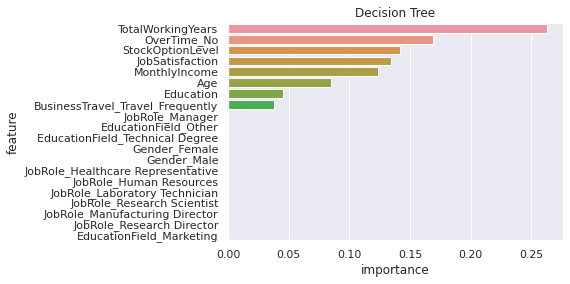

In [ ]:
drawFeatureImportance(model_decisiontree, 'Decision Tree',20)

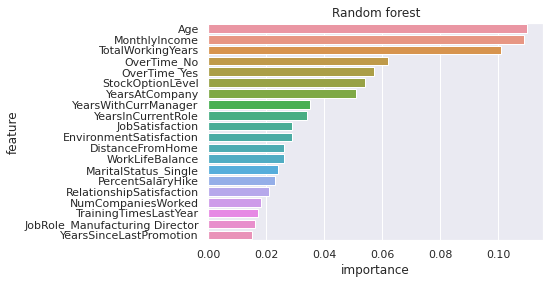

In [ ]:
drawFeatureImportance(model_randomforest, 'Random forest',20)

In [ ]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# draw tree
def drawTree(model):
  dot_data = StringIO()
  export_graphviz(model, out_file=dot_data,  
                  filled=True, rounded=True,
                  special_characters=True,
                  feature_names = X_train.columns,
                  class_names=[str(x) for x in model.classes_]
                  )
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
  return graph.create_png()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYsJGqOEwiOVOFHnbeIgzmXCwgAKImInIUl9zWVQxUHEYbLM0s9Q&s)
# **Câu hỏi**: Nhìn vào hình vẽ, hãy tìm ra những điều kiện dẫn đến một người phải nghỉ việc /  không muốn nghỉ việc

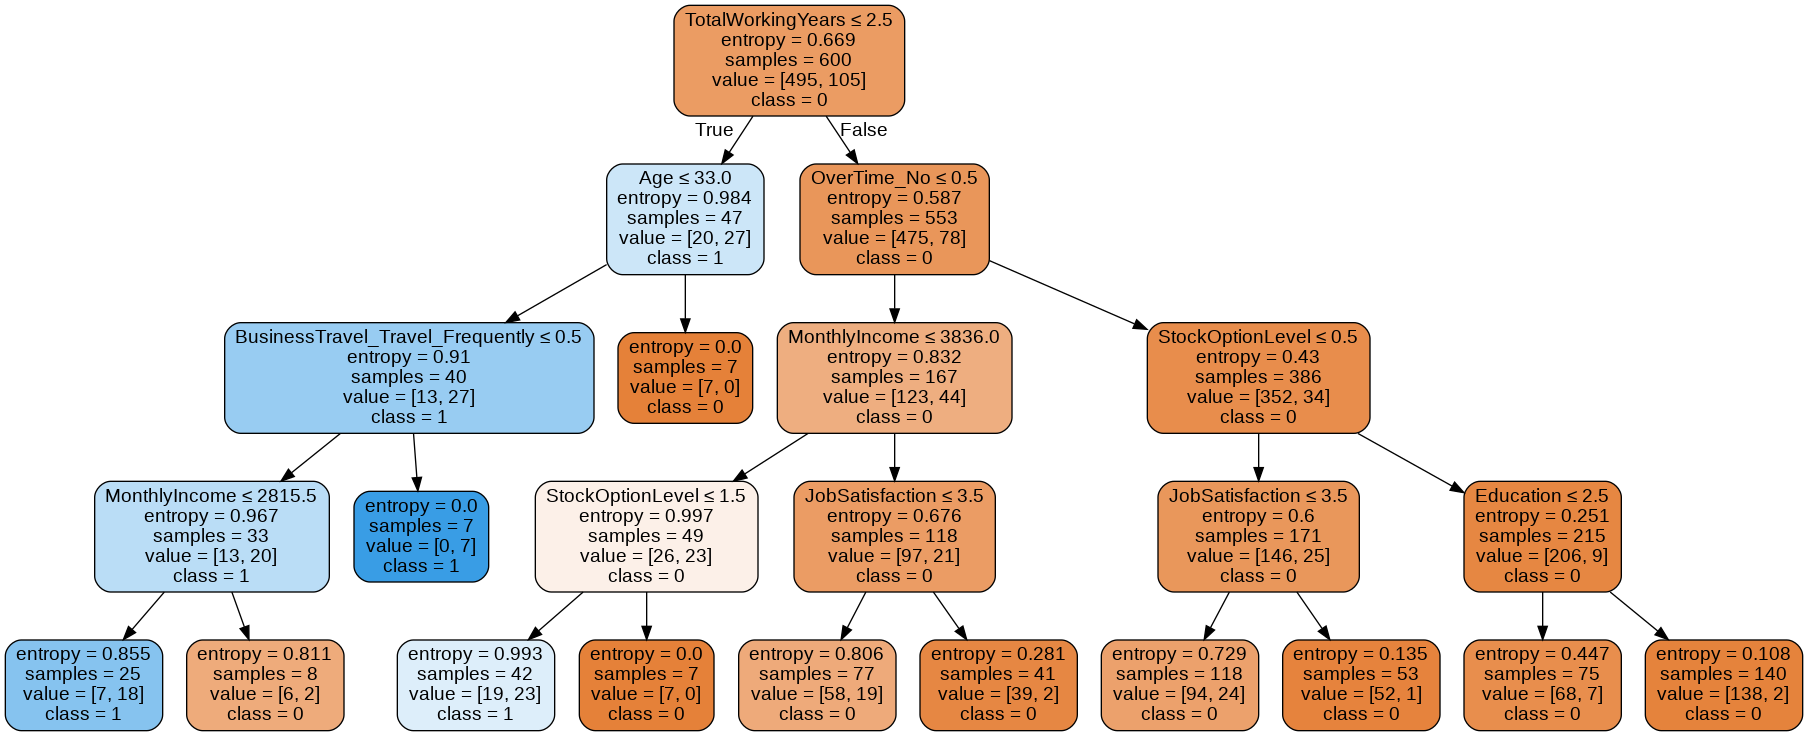

In [ ]:
Image(drawTree(model_decisiontree))
# Trái Yes, phải No
# Entropy impurity

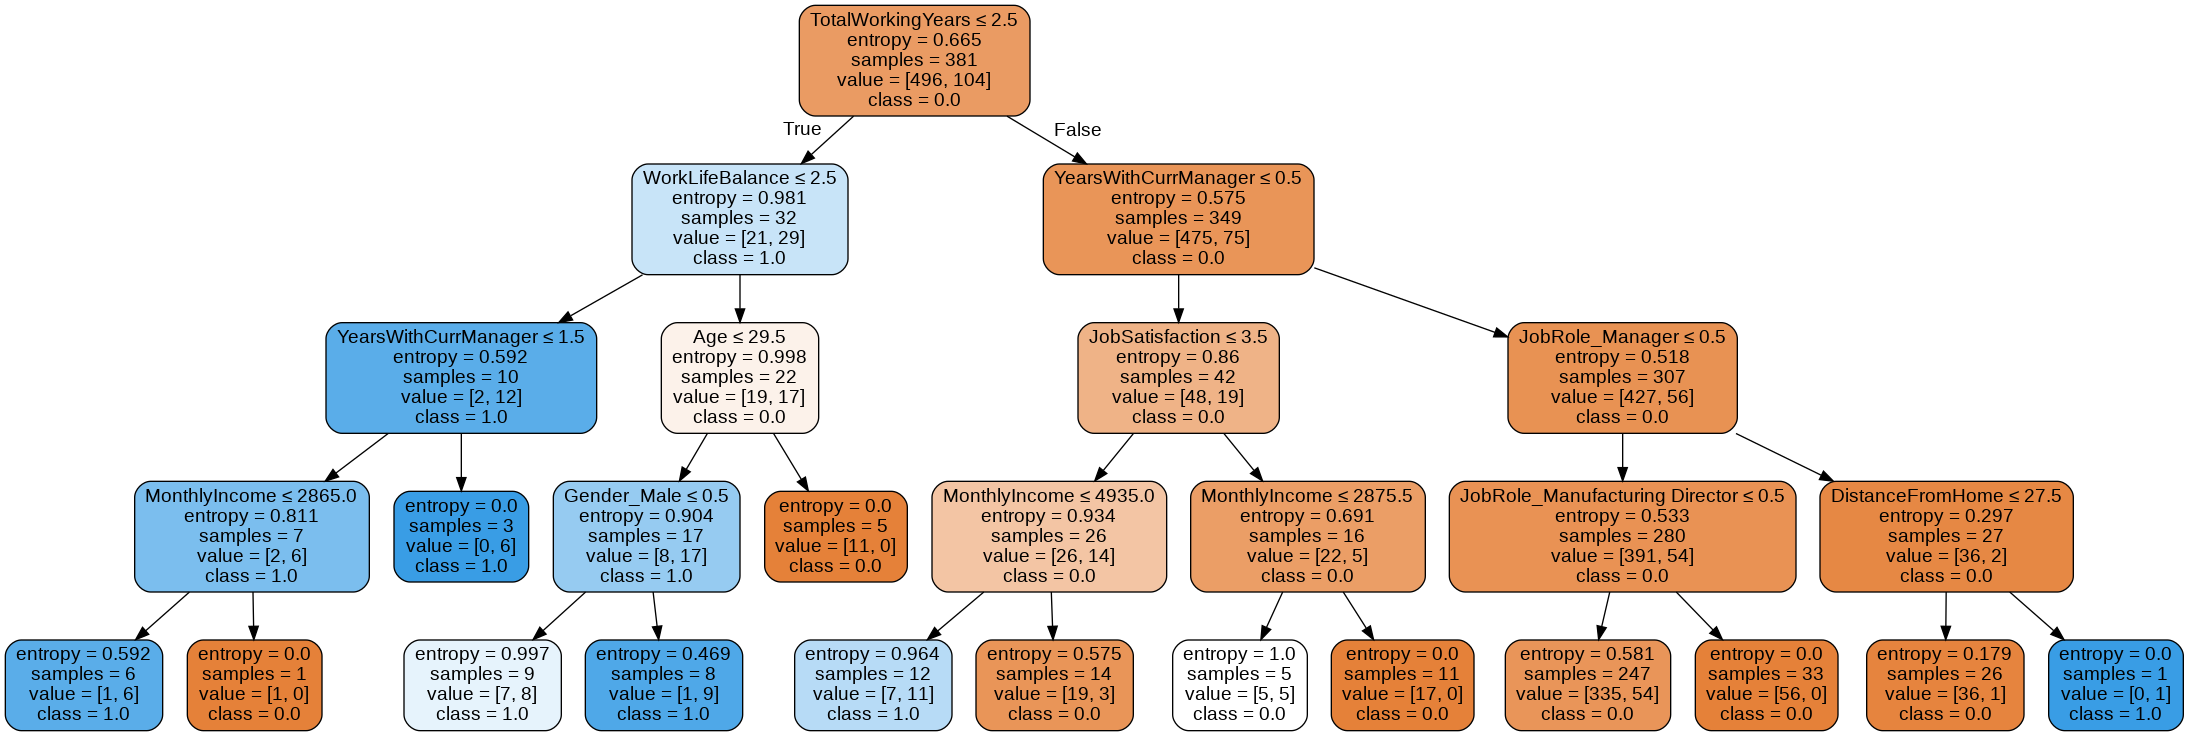

In [ ]:
Image(drawTree(model_randomforest.estimators_[100]))

## ROC & AUC
Một số khái niệm:
- True Possitive (TP): Sự kiện xảy ra và ta dự báo có xảy ra
- False Possitive (FP): Sử kiện có xảy ra và ta dự báo không xảy ra
- True Negative (TN): Sự kiện không xảy ra và ta dự báo có xảy ra
- False Negative (FN): Sự kiện không xảy ra và ta dự báo không xảy ra

Vây ta sẽ tính tỉ lệ đoán trúng (true positive rate) và tỉ lệ đoán trật (false positive rate) như sau:

$$ TPR = \frac{TP}{TP+FN}$$
$$ FPR = \frac{FP}{FP+TN}$$

No Skill: ROC AUC=0.500
With mlp: ROC AUC=0.761
With decision tree: ROC AUC=0.661
With random forest: ROC AUC=0.762
Best: ROC AUC=1.000


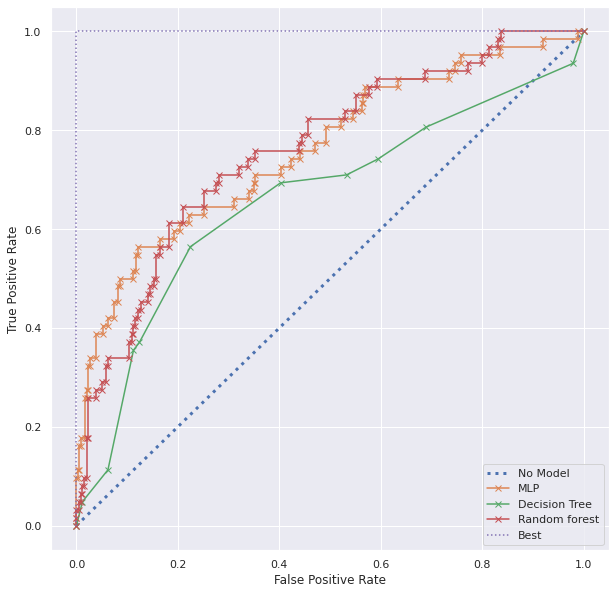

In [ ]:
# ROC & AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# pred_proba = model.predict_proba(X_val)
# print('AUC: ' + str(roc_auc_score(y_val, pred_proba[:,1])))

nomodel_probs = [0 for _ in range(len(y_val))]

mlp_probs = model.predict(X_val_scaled)[:, 0]

decisiontree_probs = model_decisiontree.predict_proba(X_val)[:, 1]

randomforest_probs = model_randomforest.predict_proba(X_val)[:, 1]

best_probs = [x for x in y_val]

nomodel_auc = roc_auc_score(y_val, nomodel_probs)
mlp_auc = roc_auc_score(y_val, mlp_probs)
decisiontree_auc = roc_auc_score(y_val, decisiontree_probs)
randomforest_auc = roc_auc_score(y_val, randomforest_probs)
best_auc = roc_auc_score(y_val, best_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (nomodel_auc))
print('With mlp: ROC AUC=%.3f' % (mlp_auc))
print('With decision tree: ROC AUC=%.3f' % (decisiontree_auc))
print('With random forest: ROC AUC=%.3f' % (randomforest_auc))
print('Best: ROC AUC=%.3f' % (best_auc))

# calculate roc curves
nomodel_fpr, nomodel_tpr, _ = roc_curve(y_val, nomodel_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_val, mlp_probs)
decisiontree_fpr, decisiontree_tpr, _ = roc_curve(y_val, decisiontree_probs)
randomforest_fpr, randomforest_tpr, _ = roc_curve(y_val, randomforest_probs)
best_fpr, best_tpr, _ = roc_curve(y_val, best_probs)

plt.figure(figsize=(10,10))
# plot the roc curve for the model
plt.plot(nomodel_fpr, nomodel_tpr, linestyle=':',linewidth=3, label='No Model')
plt.plot(mlp_fpr, mlp_tpr, marker='x', label='MLP')
plt.plot(decisiontree_fpr, decisiontree_tpr, marker='x', label='Decision Tree')
plt.plot(randomforest_fpr, randomforest_tpr, marker='x', label='Random forest')
plt.plot(best_fpr, best_tpr, linestyle=':', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# **Hãy giải thích vì sao random forest lại tốt hơn MLP trong trường hợp (bài toán) này trong khi neuron network là thuật toán hiện đại và được đánh giá cao?**

![alt text](https://www.researchgate.net/profile/Benoit_Gallix/publication/324457640/figure/fig1/AS:622298201595905@1525378861825/Graph-illustrating-the-impact-of-data-available-on-performance-of-traditional-machine.png)

# 5. Dự báo người sẽ nghỉ việc

In [ ]:
# Từ model tính predict sẽ ra 0 1
predict = model_randomforest.predict(df_test_merge)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Tạo một Dataframe mới bao gồm EmployeeNumber trong df_test và các giá trị vừa predict (Attrition)

Tái tạo data. Nối trên vs Employee Number


In [ ]:
predict = pd.DataFrame({'EmployeeNumber':df_test.index,'Attrition':predict})
predict.head()

,EmployeeNumber,Attrition
0,1409,0
1,1411,0
2,1412,0
3,1415,0
4,1417,0


Merge các cột còn lại trong df_test với dataframe vừa tạo

Nối trên vs data cột còn lại

In [ ]:
predict = predict.merge(df_test_merge,on='EmployeeNumber')
predict.head(3)

,EmployeeNumber,Attrition,Age,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1409,0,52,8,4,1,3,1,2950,9,13,3,3,0,12,2,1,5,4,0,4,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,1411,0,37,11,3,1,1,3,3629,4,18,3,1,0,8,6,3,3,2,0,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,1412,0,35,18,2,1,3,4,9362,2,11,3,3,0,10,2,3,2,2,2,2,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0


# 6. Thử nghiệm một chính sách về nhân sự

## Danh sách những người dự báo sẽ nghỉ

In [ ]:
predict[predict['Attrition'] == 1].shape

(7, 49)

In [ ]:
new_policy = predict.copy(True)
new_policy = new_policy.drop(columns=['Attrition'])
new_policy = new_policy.drop(columns=['EmployeeNumber'])


## Thực thi một chính sách về nhân sự

In [ ]:
# X_policy['MonthlyIncome'] = X_policy['MonthlyIncome']*1.1 
# new_policy['OverTime_No'] = 1
# new_policy['OverTime_Yes'] = 0
# Đổi OT sang ngược lại rồi test model

new_policy['MonthlyIncome'] = 3900

In [ ]:
result = model_randomforest.predict(new_policy)

In [ ]:
len(np.where(result==1)[0])
# Chỉ còn 3 đứa nghỉ thay vì 7

0

## **Kết quả: Nếu bỏ chính sách overtime trong doanh nghiệp thì những người này sẽ ở lại doanh nghiệp**